# Content and Objectives

+ Confirm approximation of the sum of 4 uniformly distributed random variables by the central limit theorem
+ Check examples (numbers) given in the lecture discussing probability of students populating a lecture hall for an exam

# Import

In [2]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [3]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Adding up 4 Uniformly Distributed Random Variables

In [4]:
# theoretical values
N = 4
E_SN = N * .5
D2_SN = N / 12

t = np.arange( 0, N, .01 )
f_theo_norm = 1 / np.sqrt( 2*np.pi*D2_SN ) * np.exp( - ( t - E_SN )**2 / 2 / D2_SN )


# simulation
N_trials = int( 1e4 )

# get uniformly distributed values and map according to theorem
X = np.random.rand( N, N_trials )

Z = np.sum( X, axis = 0 )

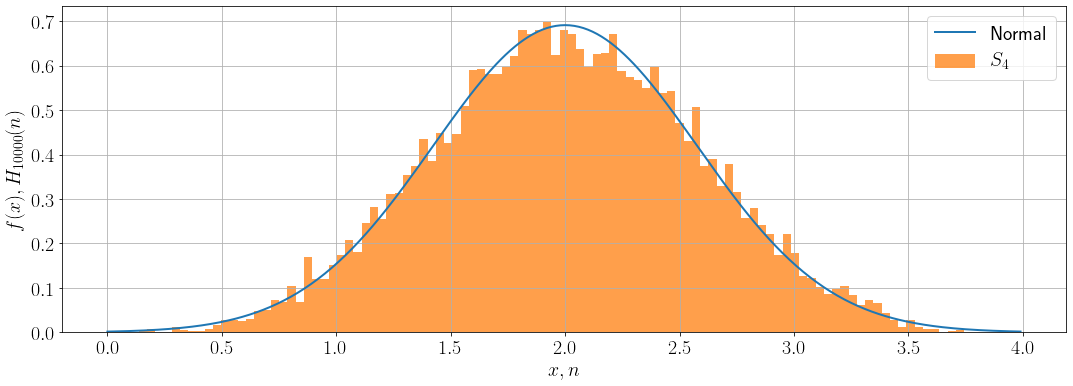

In [5]:
# plotting
plt.plot( t, f_theo_norm, linewidth=2.0, label='Normal')    
plt.hist( Z, 100, density=True, label='$S_4$', alpha=0.75)    

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format(N_trials)) 
plt.grid( True )
plt.legend( loc = 'upper right' )

# Showing Approximation by Using Smaller Number of Bins

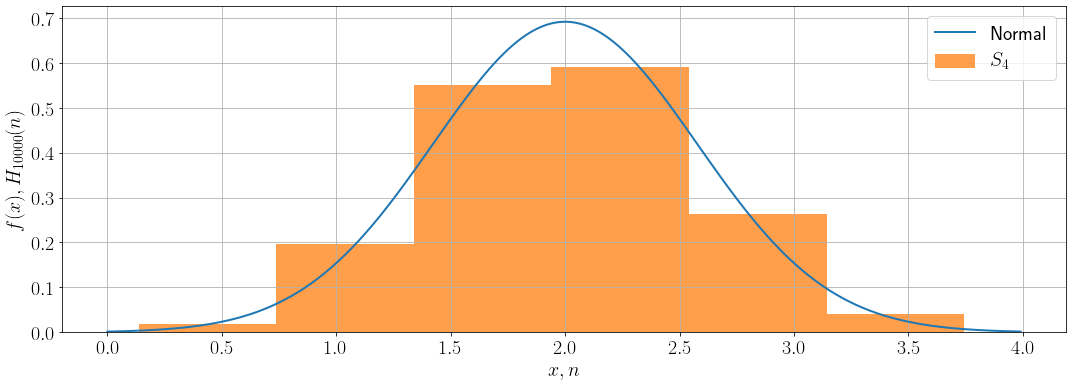

In [7]:
# plotting
plt.plot( t, f_theo_norm, linewidth=2.0, label='Normal')    
plt.hist( Z, 6, density=True, label='$S_4$', alpha=0.75)    

plt.xlabel('$x, n$')
plt.ylabel('$f(x), H_{{{}}}(n)$'.format(N_trials)) 
plt.grid( True )
plt.legend( loc = 'upper right' )

# Example: Students Participating in Exam

### Parameters

In [5]:
# number of students and seats, respectively
N_students = 350
N_seats = 333

# probability of participation
p = 0.95

# number of trials for estimating probability
N_trials = int( 1e4 ) 

### Necessary Seats 

In [6]:
# initialize list for number of participants
participants = []

# loop for trials
for _n in range( N_trials ):
    
    # sample if student is participating
    # NOTE: By condition "random uniform < p", probability of participation equalling p is being realized
    sample = np.random.rand( N_students )   
    
    number = np.sum( [ int( s <= p ) for s in sample ] )
    participants.append( number )

# find histogram
bins = range( 0, N_students )
p_hist = np.histogram( participants, bins=bins, density=True)

# get cdf and find smallest index such that P > 0.99
# NOTE: Since we are dealing with indices, ...
#           solution is always an integer
#           +1 is added since indexing starts at 0 

cdf = np.cumsum( p_hist[0] )
N_needed = np.min( np.where( cdf > 0.99 ) ) + 1

In [7]:
# printing results
print('Simulation: \t\t\t\t{:2.3f}\n'.format( N_needed ) )

approximation = stats.norm.ppf( 0.99 ) * np.sqrt( N_students * p * (1-p) ) + N_students * p
approximation_wc = stats.norm.ppf( 0.99 ) * np.sqrt( N_students * p * (1-p) ) + N_students * p + 0.5

print('Approximation by CLT: \t\t\t{:2.3f}'.format( approximation ) )
print('Approximation by CLT w. correction: \t{:2.3f}\n'.format( approximation_wc ) )

Simulation: 				342.000

Approximation by CLT: 			341.985
Approximation by CLT w. correction: 	342.485



### Probability of Failure

In [8]:
# initialize counter for fail exam
fail = 0 

# loop for trials
for _n in range( N_trials ):
    
    # sample if student is participating
    sample = np.random.rand( N_students )    
    participating = np.sum( [ int( s <= p ) for s in sample ] )
    
    # check if number of participants exceed limit
    if participating > N_seats:
        fail += 1


In [9]:
# printing results
print('Simulation: \t\t\t\t{:2.3f}'.format( fail / N_trials ) )

theoretical = np.sum( [ special.binom( N_students, k ) * p**k * (1-p)**(N_students-k) for k in range( N_seats + 1, N_students + 1 ) ] )
print('Theoretical value: \t\t\t{:2.3f}\n'.format( theoretical ) )

approx_clt = 1 - stats.norm.cdf( ( N_seats - N_students * p ) / np.sqrt( N_students *  p * (1-p ) ) )  
print('Approximation by CLT: \t\t\t{:2.3f}'.format( approx_clt ) )

approx_clt_w_corr = 1 - stats.norm.cdf( ( N_seats - N_students * p + 0.5) / np.sqrt( N_students *  p * (1-p ) ) )  
print('Approximation by CLT w. correction: \t{:2.3f}'.format( approx_clt_w_corr ) )

Simulation: 				0.415
Theoretical value: 			0.417

Approximation by CLT: 			0.451
Approximation by CLT w. correction: 	0.403
